<a href="https://colab.research.google.com/github/aleix8ig/AutoRegressive-Time-Series/blob/main/ARmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
ticker = "AMD"
end_date = datetime.datetime.now().date()
start_date = end_date - datetime.timedelta(days=60)
data = yf.download(ticker, start=start_date, end=end_date)
closing_prices = data["Close"]
print(len(closing_prices))

[*********************100%%**********************]  1 of 1 completed

39


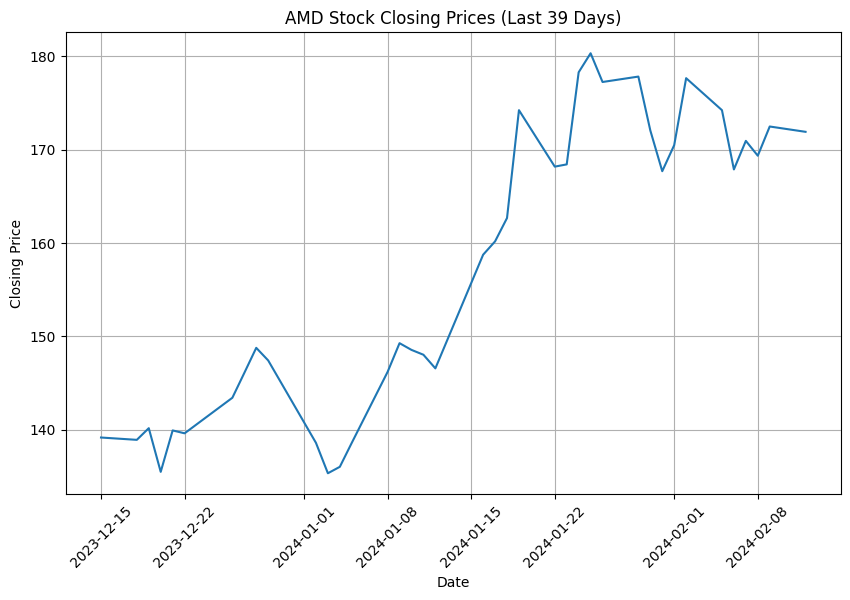

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(closing_prices)
plt.title("AMD Stock Closing Prices (Last 39 Days)")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
n_test = 1
train_data = closing_prices[:len(closing_prices)-n_test]
test_data = closing_prices[len(closing_prices)-n_test:]
print(test_data)

Date
2024-02-12    171.910004
Name: Close, dtype: float64


In [ ]:
error_list = []
for i in range(1,11):
    model = AutoReg(train_data, lags=i)
    model_fit = model.fit()
    predicted_price = float(model_fit.predict(start=len(train_data), end=len(train_data)))
    actual_price = test_data.iloc[0]
    error_list.append(abs(actual_price - predicted_price))


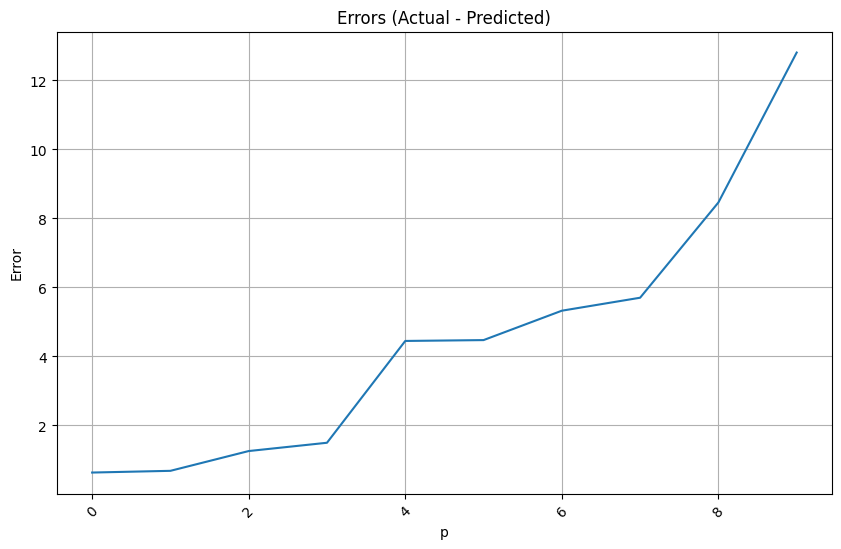

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(error_list)
plt.title("Errors (Actual - Predicted)")
plt.xlabel("p")
plt.ylabel("Error")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()